# 201710758 김진성 hw9 과제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import skimage
from skimage import data
from skimage import io

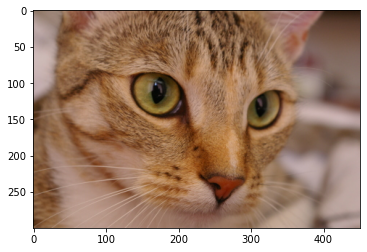

In [3]:
cat = data.chelsea()
plt.imshow(cat)
plt.show()

# cropping을 사용해 재작성한 conv 함수

In [4]:
def convolve(image, kernel, scale=1):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = (kW - 1)//2
    output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

    for y in np.arange(pad, iH - pad):
        for x in np.arange(pad, iW - pad):
            roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
            
            if ((roi * kernel).sum()*scale > 255):
                output[y-pad, x-pad] = 255
            elif ((roi * kernel).sum()*scale < 0):
                output[y-pad, x-pad] = 0
            else:
                output[y-pad, x-pad] = (roi * kernel).sum()*scale
    return output

# 가우시안 필터

In [5]:
def gauss2D(shape=(3,3),sigma=1):
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

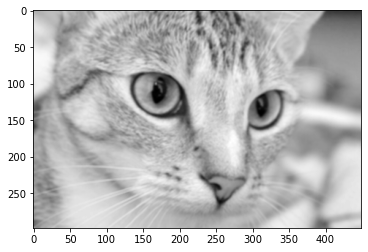

In [6]:
Gaussian_3 = np.array((
    [1,2,1],
    [2,4,2],
    [1,2,1]), dtype="int")

filtered = convolve(cat[:,:,0], gauss2D(sigma=5), scale=1/16)
plt.imshow(filtered, cmap=plt.cm.gray)

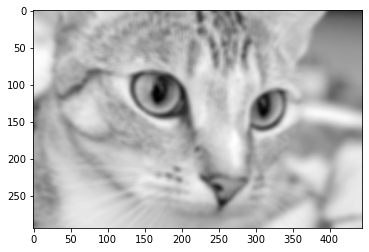

In [7]:
filtered_gauss7 = convolve(cat[:,:,0], gauss2D((7,7),5), scale=1/140)
plt.imshow(filtered_gauss7, cmap=plt.cm.gray)

# 3x3 가우시안 마스크에 비해 좀 더 스무딩 효과가 나타난다.

# Laplacian filter

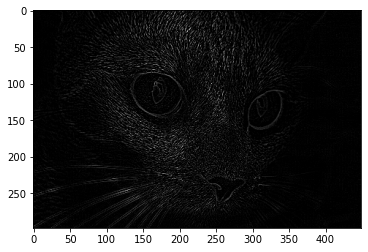

In [9]:
Lap = np.array((
	[0,1,0],
    [1,-4,1],
    [0,1,0]), dtype="int")

filtered = convolve(cat[:,:,0], Lap)
plt.imshow(filtered, cmap=plt.cm.gray)

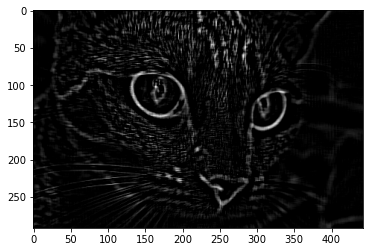

In [10]:
Lap = np.array((
	[0,1,0],
    [1,-4,1],
    [0,1,0]), dtype="int")

filtered = convolve(filtered_gauss7, Lap)
plt.imshow(filtered, cmap=plt.cm.gray)

# 스무딩을 안하고 윤곽선을 추출했을때는 너무 미세해서 형태를 잘 파악할 수 없었지만, 스무딩을 한 상태에서 보니 형태를 훨씬 잘 알아볼 수 있었습니다.